#### LogisticRegressionでワインの評価をする

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('wine.csv', index_col=0)
df.head(3)

,酒石酸,酢酸,クエン酸,残糖,塩化ナトリウム,遊離SO2,総SO2,密度,pH,硫化カリウム,アルコール度数,評価
0,6.8,0.63,0.12,3.8,0.099,16.0,126.0,0.99690,3.28,0.61,9.5,0
1,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,0
2,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,0


#### グラフにデータをプロットしてみる

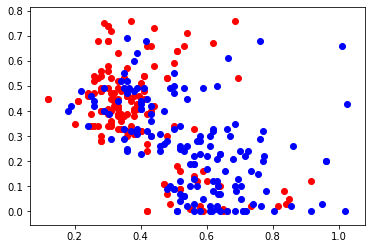

In [10]:
df1 = df[df['評価'] == 1] ## 高評価
df0 = df[df['評価'] == 0] ## 低評価

plt.scatter(df1["酢酸"], df1["クエン酸"], color='red')
plt.scatter(df0["酢酸"], df0["クエン酸"], color='blue');

In [11]:
# 説明変数 X 目的変数 y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split

(X_train, X_test, 
 y_train, y_test ) = train_test_split(
    X, y, test_size=0.3, random_state=0,)

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, solver='liblinear')

In [15]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# スコアの計算
lr.score(X_test, y_test)

0.8222222222222222

#### ※ LogisticRegression の弱点は単純な線形で分割できないもの